# **Geospatial Distribution of Moderate Housing Insecurity in the Greater Sacramento Area**
### by Sandra J. Garren, Ph.D.

This analysis provides the python workflow to show the current geospatial distribution of moderate housing insecurity of homeowners and renters in the Sacramento-Roseville, CA Combined Statistical Area (CSA). The analysis uses Censusdis to obtain and map housing insecurity at the census tract level for the combined total of homeowners with and without a mortgage and from renters across the CSA for the year 2021. 

1.  Install censisdis into python
2.  Define "Housing Insecurity" and identify data
3.  Define geographic boundaries
4.  Map the housing data

####
#### **Step 1. Install "censusdis" into python**

In [34]:
pip install censusdis

Note: you may need to restart the kernel to use updated packages.


####
#### **Step 2. Define "Moderate Housing Insecurity" and identify data**
Moderate housing insecurity is defined as total households that spend between 30% and 50% of housing costs as a percentage of income. Severe housing insecurity is defined as total households that spend above 50% of income on housing. The US Census collects data for homeowners with/without a mortgage and for renters. The data was queried in censusdis to identify the group code and exact data column numbers for these three variables for totals.

#####
##### *2a. Housing insecurity between 30% and 50% AND over 50% for homeowners with and without a mortgage*

In [35]:
import censusdis.data as ced
DATASET = 'acs/acs5'
VINTAGE = 2021

In [36]:
df_groups_SMOCAPI = ced.variables.all_groups(DATASET, VINTAGE)

In [37]:
df_groups_SMOCAPI[
    df_groups_SMOCAPI['DESCRIPTION'].str.contains('SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE')
]

,DATASET,YEAR,GROUP,DESCRIPTION
815,acs/acs5,2021,B25091,MORTGAGE STATUS BY SELECTED MONTHLY OWNER COST...
816,acs/acs5,2021,B25092,MEDIAN SELECTED MONTHLY OWNER COSTS AS A PERCE...
817,acs/acs5,2021,B25093,AGE OF HOUSEHOLDER BY SELECTED MONTHLY OWNER C...
819,acs/acs5,2021,B25095,HOUSEHOLD INCOME BY SELECTED MONTHLY OWNER COS...


In [38]:
GROUP1 = 'B25091'

In [39]:
ced.variables.group_tree(DATASET, VINTAGE, GROUP1)

+ Estimate
    + Total: (B25091_001E)
        + Housing units with a mortgage: (B25091_002E)
            + Less than 10.0 percent (B25091_003E)
            + 10.0 to 14.9 percent (B25091_004E)
            + 15.0 to 19.9 percent (B25091_005E)
            + 20.0 to 24.9 percent (B25091_006E)
            + 25.0 to 29.9 percent (B25091_007E)
            + 30.0 to 34.9 percent (B25091_008E)
            + 35.0 to 39.9 percent (B25091_009E)
            + 40.0 to 49.9 percent (B25091_010E)
            + 50.0 percent or more (B25091_011E)
            + Not computed (B25091_012E)
        + Housing units without a mortgage: (B25091_013E)
            + Less than 10.0 percent (B25091_014E)
            + 10.0 to 14.9 percent (B25091_015E)
            + 15.0 to 19.9 percent (B25091_016E)
            + 20.0 to 24.9 percent (B25091_017E)
            + 25.0 to 29.9 percent (B25091_018E)
            + 30.0 to 34.9 percent (B25091_019E)
            + 35.0 to 39.9 percent (B25091_020E)
            + 40.0 t

In [40]:
TOTAL_HOMEOWNERS=['B25091_001']
TOTAL_OWN_INS=['B25091_003E','B25091_004E','B25091_005E','B25091_006E','B25091_007E','B25091_008E','B25091_009E','B25091_010','B25091_011E','B25091_014E','B25091_015','B25091_016E','B25091_017E','B25091_018E','B25091_019E','B25091_020E','B25091_021E','B25091_022']
TOTAL_OWN_INS_30_50=['B25091_008E', 'B25091_009', 'B25091_010E','B25091_019E', 'B25091_020E','B25091_021E']
TOTAL_OWN_INS_50=['B25091_011E','B25091_022E']

##### 
##### 2b. Housing insecurity between 30% and 50% AND over 50% for renters

In [41]:
DATASET = 'acs/acs5'
VINTAGE = 2021

In [42]:
df_groups_GRAPI = ced.variables.all_groups(DATASET, VINTAGE)

In [43]:
df_groups_GRAPI[
    df_groups_GRAPI['DESCRIPTION'].str.contains('GROSS RENT AS A PERCENTAGE')
]

,DATASET,YEAR,GROUP,DESCRIPTION
796,acs/acs5,2021,B25070,GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME...
797,acs/acs5,2021,B25071,MEDIAN GROSS RENT AS A PERCENTAGE OF HOUSEHOLD...
798,acs/acs5,2021,B25072,AGE OF HOUSEHOLDER BY GROSS RENT AS A PERCENTA...
799,acs/acs5,2021,B25074,HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE...


In [44]:
GROUP2='B25070'

In [45]:
ced.variables.group_tree(DATASET, VINTAGE, GROUP2)

+ Estimate
    + Total: (B25070_001E)
        + Less than 10.0 percent (B25070_002E)
        + 10.0 to 14.9 percent (B25070_003E)
        + 15.0 to 19.9 percent (B25070_004E)
        + 20.0 to 24.9 percent (B25070_005E)
        + 25.0 to 29.9 percent (B25070_006E)
        + 30.0 to 34.9 percent (B25070_007E)
        + 35.0 to 39.9 percent (B25070_008E)
        + 40.0 to 49.9 percent (B25070_009E)
        + 50.0 percent or more (B25070_010E)
        + Not computed (B25070_011E)

In [52]:
TOTAL_RENTERS=['B25070_001E']
TOTAL_RENT_INS=['B25070_002','B25070_003E','B25070_004E','B25070_005E','B25070_006E','B25070_007E','B25070_008E','B25070_OO9E','B25070_010E']
TOTAL_RENT_INS_30_50=['B25070_007E','B25070_008E','B25070_009E']
TOTAL_RENT_INS_50=['B25070_010E']

In [53]:
VARS_INS_30_50=['B25091_008E', 'B25091_009E', 'B25091_010E','B25091_019E', 'B25091_020E','B25091_021E','B25070_007E','B25070_008E','B25070_009E']
VARS_INS_50=['B25091_011E','B25091_022E','B25070_011E']
VARS_INS=['B25091_003E','B25091_004E','B25091_005E','B25091_006E','B25091_007E','B25091_008E','B25091_009E','B25091_010','B25091_011E','B25091_014E','B25091_015','B25091_016E','B25091_017E','B25091_018E','B25091_019E','B25091_020E','B25091_021E','B25091_022','B25070_002','B25070_003E','B25070_004E','B25070_005E','B25070_006E','B25070_007E','B25070_008E','B25070_OO9E','B25070_010E']

####
#### **Step 3. Define Geography** 

In [48]:
import censusdis.geography as cgeo

specs = cgeo.geo_path_snake_specs(DATASET, VINTAGE)

In [54]:
df_CA = ced.download(
    DATASET,
    VINTAGE,
    ['NAME'] + VARS_INS_30_50,
    state="*"
)

In [55]:
df_CA

,STATE,NAME,B25091_008E,B25091_009E,B25091_010E,B25091_019E,B25091_020E,B25091_021E,B25070_007E,B25070_008E,B25070_009E
0,01,Alabama,40036,27019,31895,11774,8795,10960,44097,30377,43088
1,02,Alaska,7861,5154,6472,1366,1258,1251,8048,5434,7584
2,04,Arizona,73289,48974,58853,15248,9359,11869,79296,58411,78864
3,05,Arkansas,22918,14785,17749,7451,5181,6627,32748,21343,28780
4,06,California,432106,300475,373932,65577,46020,64259,527598,393196,561379
5,08,Colorado,74460,49576,59040,9656,6594,8465,71918,50384,69957
6,09,Connecticut,44635,31059,35262,12755,9225,13266,40098,29932,39516
7,10,Delaware,11793,8283,8878,2560,1720,2145,9210,6817,8985
8,11,District of Columbia,6445,4308,4291,515,302,465,16924,11565,12853
9,12,Florida,225731,158527,194553,68663,51423,65169,247027,193240,276324


In [56]:
df_CA[df_CA['NAME'].str.startswith('California')] 

,STATE,NAME,B25091_008E,B25091_009E,B25091_010E,B25091_019E,B25091_020E,B25091_021E,B25070_007E,B25070_008E,B25070_009E
4,06,California,432106,300475,373932,65577,46020,64259,527598,393196,561379


In [66]:
CA='06'

In [67]:
df_csa = ced.download(
    DATASET,
    VINTAGE,
    ['NAME'] + VARS_INS_30_50,
    combined_statistical_area="*"
)

In [68]:
df_csa

,COMBINED_STATISTICAL_AREA,NAME,B25091_008E,B25091_009E,B25091_010E,B25091_019E,B25091_020E,B25091_021E,B25070_007E,B25070_008E,B25070_009E
0,104,"Albany-Schenectady, NY CSA",11693,6932,9095,3494,2517,2657,12936,8620,12309
1,106,"Albuquerque-Santa Fe-Las Vegas, NM CSA",12412,8740,10294,2706,2336,2730,11749,8967,12134
2,107,"Altoona-Huntingdon, PA CSA",1366,868,976,566,280,457,1623,1159,1296
3,108,"Amarillo-Pampa-Borger, TX CSA",2876,1542,1976,843,774,657,3134,2051,2835
4,118,"Appleton-Oshkosh-Neenah, WI CSA",3570,2352,2917,1511,936,795,3716,2707,3780
...,...,...,...,...,...,...,...,...,...,...,...
170,548,"Washington-Baltimore-Arlington, DC-MD-VA-WV-PA...",125619,78166,83577,13383,9500,11797,111648,81848,105844
171,554,"Wausau-Stevens Point-Wisconsin Rapids, WI CSA",2786,1579,2105,840,518,609,3185,2146,2971
172,556,"Wichita-Winfield, KS CSA",5465,4192,3853,1871,1085,1151,7017,5264,7012
173,558,"Williamsport-Lock Haven, PA CSA",1433,918,939,637,470,392,1838,1070,1320


In [69]:
df_csa[df_csa['NAME'].str.startswith('Sacramento')] 

,COMBINED_STATISTICAL_AREA,NAME,B25091_008E,B25091_009E,B25091_010E,B25091_019E,B25091_020E,B25091_021E,B25070_007E,B25070_008E,B25070_009E
144,472,"Sacramento-Roseville, CA CSA",35411,22731,27816,4751,3592,4805,33317,24028,35551


In [70]:
CSA_SAC = '472'

In [71]:
gdf_sac = ced.download(
    DATASET,
    VINTAGE,
    ['NAME'] + VARS_INS_30_50,
    
    combined_statistical_area=CSA_SAC,
    
    with_geometry=True
)

In [72]:
gdf_sac

,COMBINED_STATISTICAL_AREA,NAME,B25091_008E,B25091_009E,B25091_010E,B25091_019E,B25091_020E,B25091_021E,B25070_007E,B25070_008E,B25070_009E,geometry
0,472,"Sacramento-Roseville, CA CSA",35411,22731,27816,4751,3592,4805,33317,24028,35551,"POLYGON ((-122.42149 38.90233, -122.42190 38.9..."


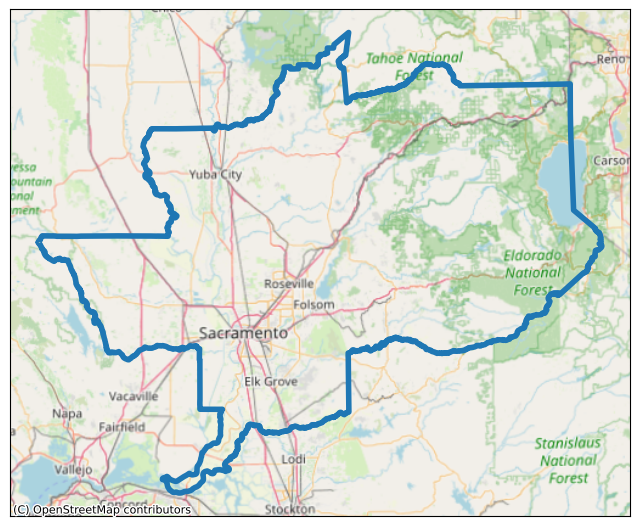

In [73]:
import censusdis.maps as cem

ax = cem.plot_map(
    gdf_sac.boundary,
    
    figsize=(8,8),
    linewidth=4,
    
    # Add a background map from OpenStreetMaps
    # so we can easily verify the geography.
    with_background=True,
)

In [74]:
gdf_sac_tracts = ced.download(
    dataset=DATASET,
    vintage=VINTAGE,
    download_variables=['NAME'] + VARS_INS_30_50,
    
    state=CA,
    tract="*",
    
    with_geometry=True
)

In [75]:
gdf_sac_tracts

,STATE,COUNTY,TRACT,NAME,B25091_008E,B25091_009E,B25091_010E,B25091_019E,B25091_020E,B25091_021E,B25070_007E,B25070_008E,B25070_009E,geometry
0,06,001,400100,"Census Tract 4001, Alameda County, California",10,21,63,0,13,18,0,0,9,"POLYGON ((-122.24691 37.88535, -122.24197 37.8..."
1,06,001,400200,"Census Tract 4002, Alameda County, California",13,6,9,0,15,0,10,6,5,"POLYGON ((-122.25742 37.84310, -122.25620 37.8..."
2,06,001,400300,"Census Tract 4003, Alameda County, California",78,20,79,15,0,14,210,186,97,"POLYGON ((-122.26416 37.84000, -122.26186 37.8..."
3,06,001,400400,"Census Tract 4004, Alameda County, California",78,30,5,20,0,22,35,0,21,"POLYGON ((-122.26180 37.84179, -122.26130 37.8..."
4,06,001,400500,"Census Tract 4005, Alameda County, California",29,58,0,0,0,0,28,23,79,"POLYGON ((-122.26941 37.84811, -122.26837 37.8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9124,06,115,040902,"Census Tract 409.02, Yuba County, California",0,0,0,0,0,0,23,34,4,"POLYGON ((-121.47709 39.14366, -121.46775 39.1..."
9125,06,115,041001,"Census Tract 410.01, Yuba County, California",97,68,0,0,0,16,0,0,0,"POLYGON ((-121.63631 39.24941, -121.63581 39.2..."
9126,06,115,041002,"Census Tract 410.02, Yuba County, California",58,16,15,0,41,0,11,0,0,"POLYGON ((-121.46947 39.33348, -121.46865 39.3..."
9127,06,115,041101,"Census Tract 411.01, Yuba County, California",66,0,30,12,34,0,0,0,64,"POLYGON ((-121.37257 39.37358, -121.37048 39.3..."


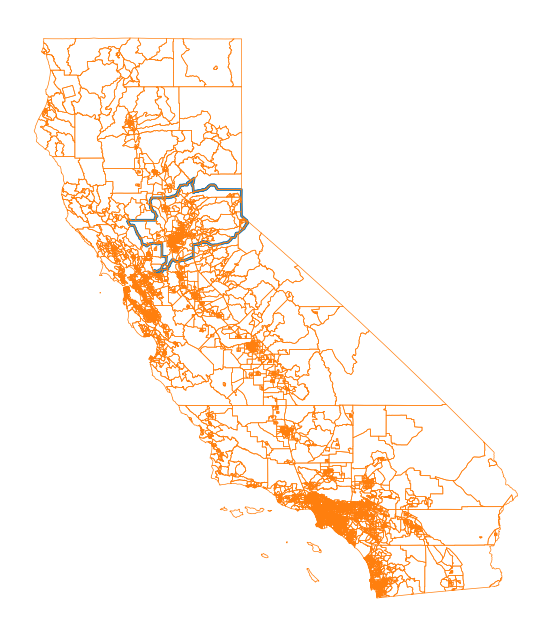

In [76]:
ax = gdf_sac.boundary.plot(
    linewidth=2,
    figsize=(8, 8)
)

ax = gdf_sac_tracts.boundary.plot(
    color='C1',
    linewidth=0.5,
    ax=ax
)

_ = ax.axis('off')

In [77]:
gdf_sac_tracts = cem.sjoin_mostly_contains(
    gdf_large_geos=gdf_sac[['geometry']].copy(),
    gdf_small_geos=gdf_sac_tracts
)

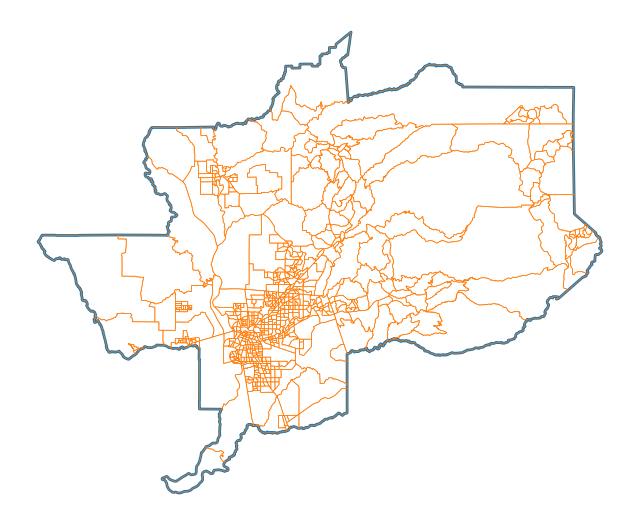

In [78]:
ax = gdf_sac.boundary.plot(
    linewidth=2,
    figsize=(8,8)
)

ax = gdf_sac_tracts.boundary.plot(
    color='C1',
    linewidth=0.5,
    ax=ax
)

_ = ax.axis('off')

In [79]:
gdf_sac_tracts['TOTAL_INS_30_50'] = gdf_sac_tracts[
    VARS_INS_30_50
].sum(axis='columns')

####
#### **Step 4. Map the housing data**

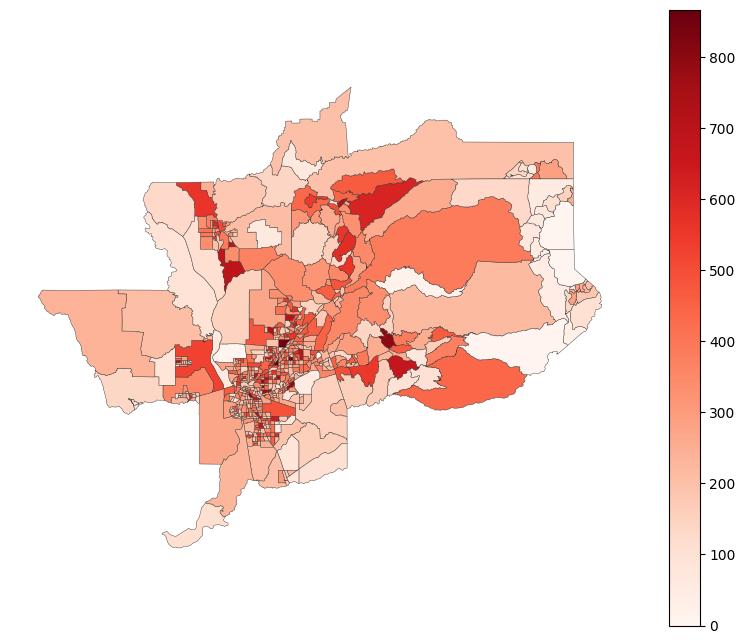

In [80]:
ax = gdf_sac_tracts.plot(
    'TOTAL_INS_30_50',
    
    cmap='Reds',
    edgecolor='#333',
    linewidth=0.3,
        
    legend=True,
    
    figsize=(10, 8)
)

_ = ax.axis('off')

In [81]:
gdf_top_20 = gdf_sac_tracts.nlargest(
    20, 'TOTAL_INS_30_50'
)[['NAME', 'TOTAL_INS_30_50', 'geometry']].reset_index(drop=True)

gdf_top_20

,NAME,TOTAL_INS_30_50,geometry
0,"Census Tract 75.01, Sacramento County, California",867,"POLYGON ((-121.36025 38.66100, -121.35271 38.6..."
1,"Census Tract 55.10, Sacramento County, California",855,"POLYGON ((-121.41072 38.58884, -121.40373 38.5..."
2,"Census Tract 209.08, Placer County, California",848,"POLYGON ((-121.33702 38.75185, -121.32882 38.7..."
3,"Census Tract 81.41, Sacramento County, California",831,"POLYGON ((-121.29028 38.69098, -121.28332 38.6..."
4,"Census Tract 310, El Dorado County, California",797,"POLYGON ((-120.88431 38.76121, -120.87321 38.7..."
5,"Census Tract 18, Sacramento County, California",794,"POLYGON ((-121.47115 38.55908, -121.46904 38.5..."
6,"Census Tract 55.05, Sacramento County, California",788,"POLYGON ((-121.41526 38.60357, -121.41527 38.6..."
7,"Census Tract 90.10, Sacramento County, California",787,"POLYGON ((-121.29842 38.58439, -121.29584 38.5..."
8,"Census Tract 54.04, Sacramento County, California",763,"POLYGON ((-121.41530 38.57411, -121.41329 38.5..."
9,"Census Tract 61.02, Sacramento County, California",760,"POLYGON ((-121.40142 38.61416, -121.40141 38.6..."


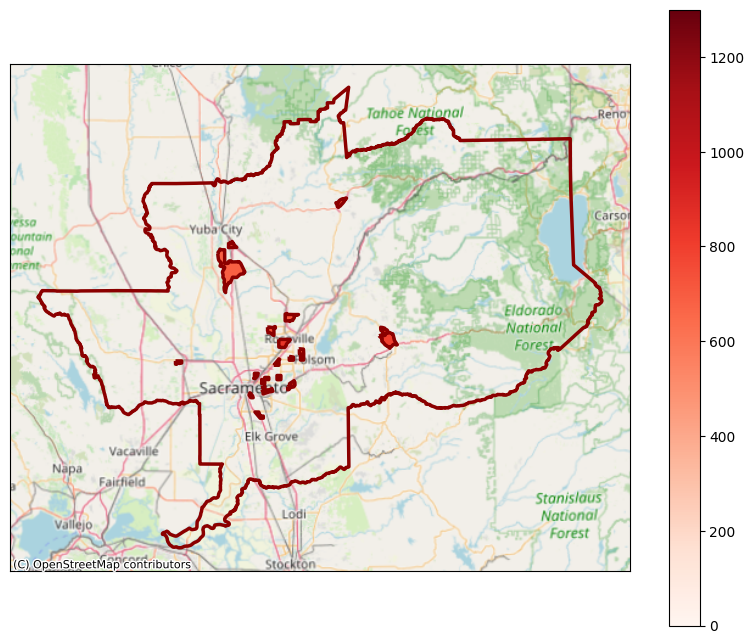

In [82]:
ax = cem.plot_map(
    gdf_top_20,
    'TOTAL_INS_30_50',
    
    cmap='Reds',
    edgecolor='darkred', 
    linewidth=2.5,
                
    vmin=0,
    vmax=1300,
    legend=True,
    
    figsize=(10, 8)
)

ax = cem.plot_map(
    gdf_sac.boundary,
    edgecolor="darkred",
    linewidth=2.5,
    ax=ax,
    with_background=True
)